In [6]:
import pandas as pd
from scipy.optimize import curve_fit
### funcion para extraer columnas de datos, coordenada l y coordenada b de los espectros
### extract_data: str -> pandas_data_frame, float, float
def extract_data(data_name):
    # verificamos que la entrada sea un string (nombre del archivo)
    assert type(data_name) == str 
    # abrimos el dataframe
    df = pd.read_csv(data_name, sep = ';')
    # almacenamos los datos de velocidad y temperatura, que se encuentran desde la fila 108 en adelante
    # ademas renombramos las columnas de velocidad y temperatura por nombres mas intuitivos 
    data = df.iloc[106:].rename(columns ={'fmt: 15 ' : 'vel', 'Unnamed: 1':'Temp'}) 
    # cambiamos el formato de los datos almacenados, para que sean del tipo numerico
    data.vel = pd.to_numeric(data.vel)
    data.Temp = pd.to_numeric(data.Temp)
    # almacenamos las coordenadas del espectro
    l_coord = float(df.iloc[20].to_numpy()[0][4:])
    b_coord = float(df.iloc[21].to_numpy()[0][4:])
    
    return data, l_coord, b_coord

def Gauss(x, A, C, B):
    y = A*np.exp(-1*((x-C)**2)/(2*B**2))
    return y

def grafico_gauss(i):
    datos, lcoord, bcoord = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
 
    velocidad=list(datos["vel"])
    temperatura=list(datos["Temp"])
    velocidad = np.asarray(velocidad)
    temperatura = np.asarray(temperatura)    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    guess = np.array([15,1,10])
    parametros, covarianza = curve_fit(Gauss, velocidad, temperatura, guess)
    fit_A = parametros[0]
    fit_B = parametros[1]
    fit_C = parametros[2]

    fit_temp = Gauss(velocidad, fit_A, fit_B, fit_C)
    ax.plot(velocidad, temperatura, 'o', label='temperatura')
    ax.plot(velocidad, fit_temp, '-', label='ajuste')
    plt.title('espectro - l = ' + str(lcoord) + ', b = ' + str(bcoord))
    plt.xlabel('v [km/s]')
    plt.ylabel('T [K]')
    ax.legend()

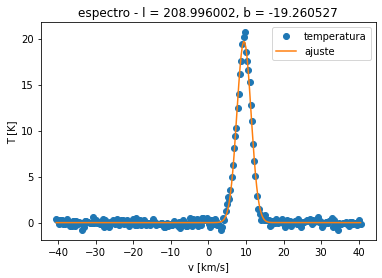

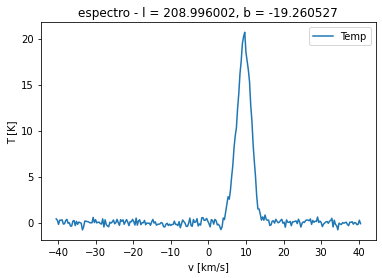

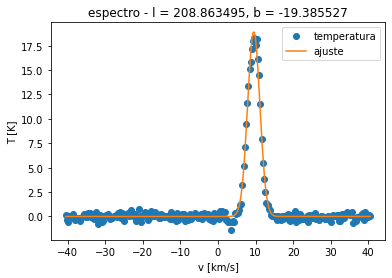

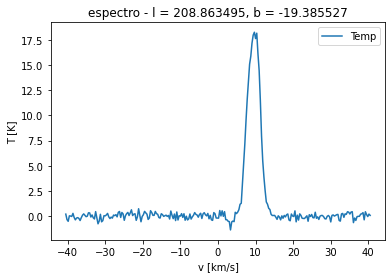

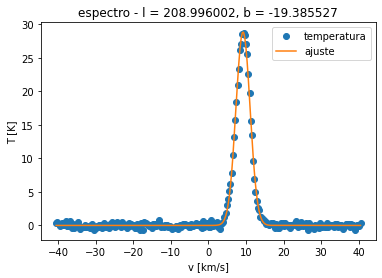

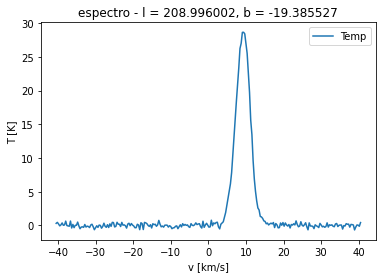

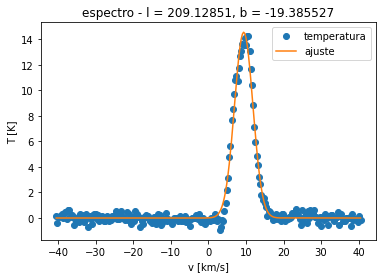

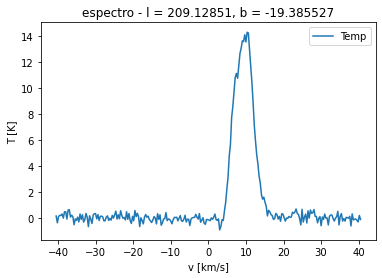

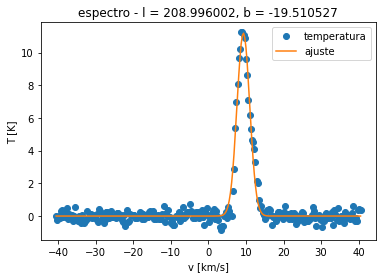

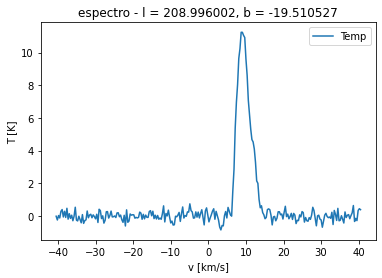

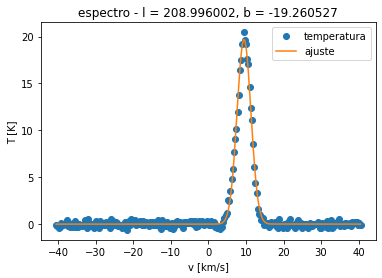

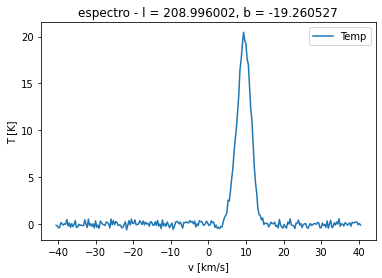

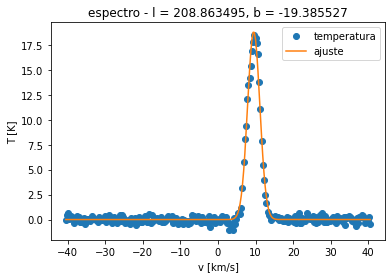

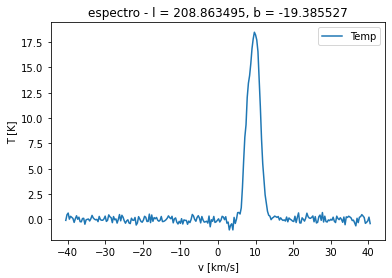

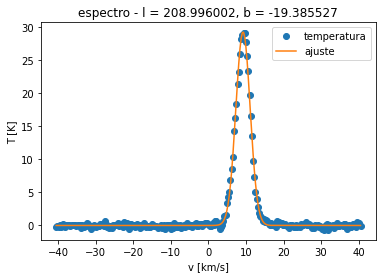

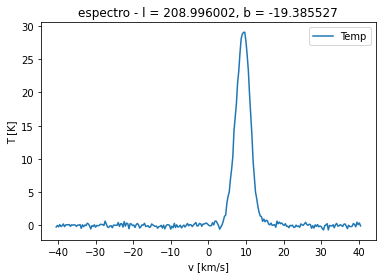

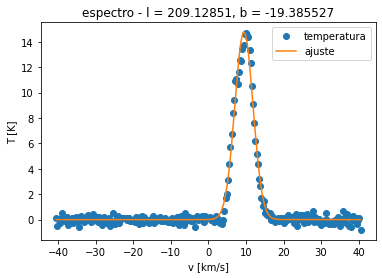

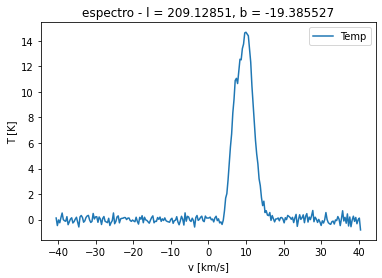

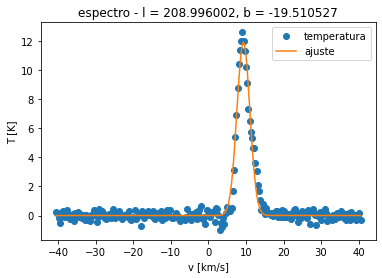

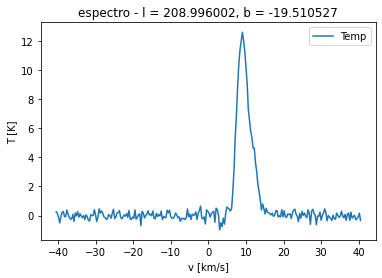

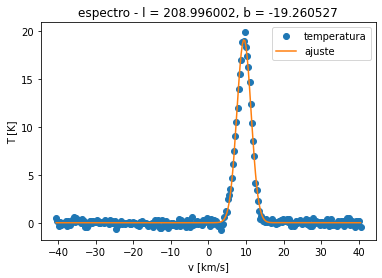

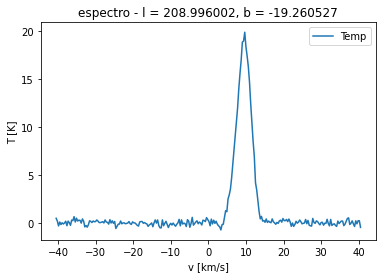

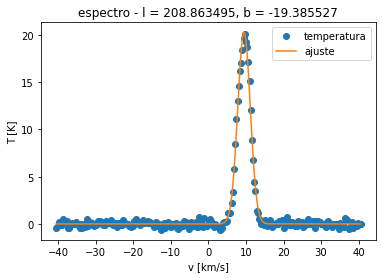

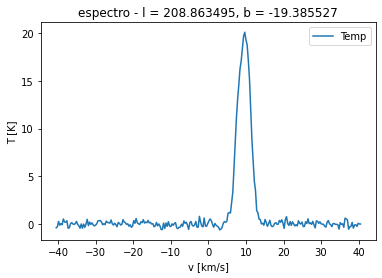

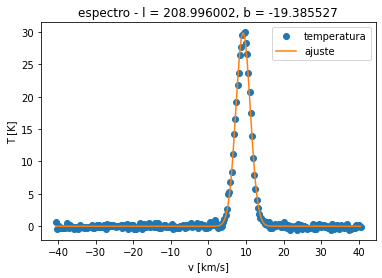

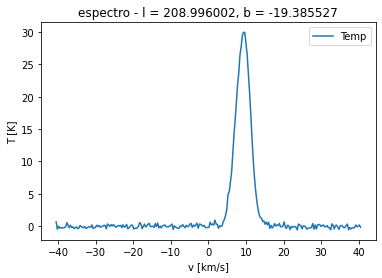

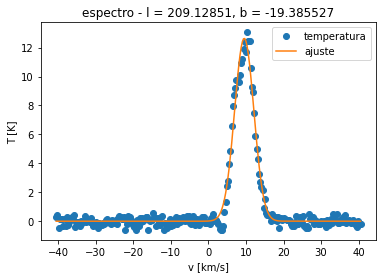

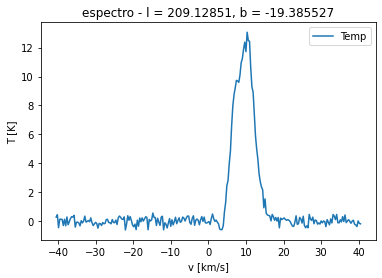

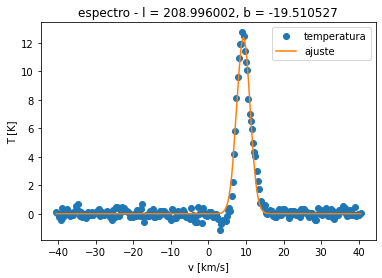

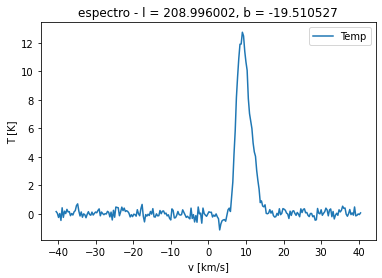

In [7]:
#a) Explicar que se observó (Notar la importancia de los pasos previos).
#gráfico de todas las temperaturas versus las velocidades
import numpy as np
import matplotlib.pyplot as plt
for i in range(11,26): 
    grafico_gauss(i)
    data_111, lcoord_111, bcoord_111 = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
    data_111.plot("vel", "Temp")  
    plt.title('espectro - l = ' + str(lcoord_111) + ', b = ' + str(bcoord_111))
    plt.xlabel('v [km/s]')
    plt.ylabel('T [K]')
    plt.show()

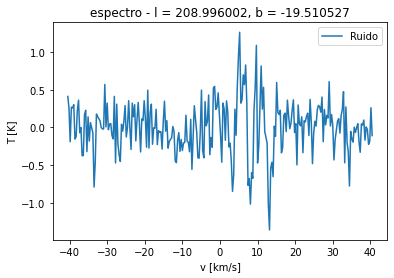

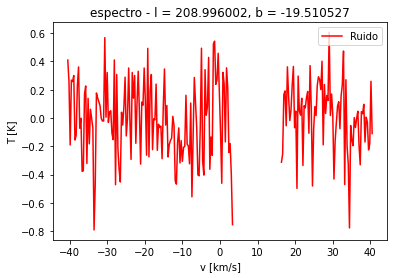

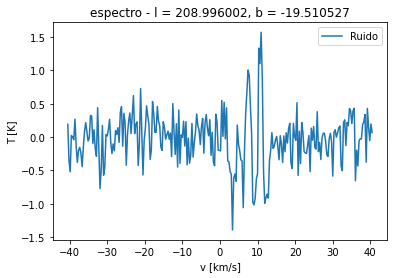

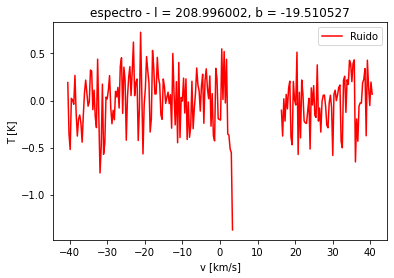

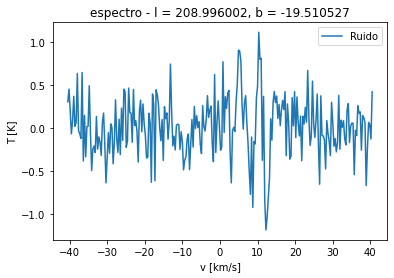

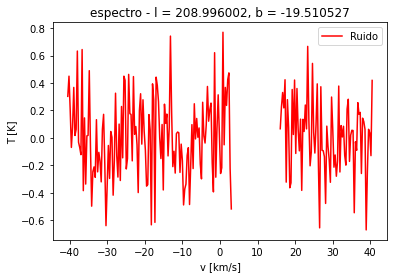

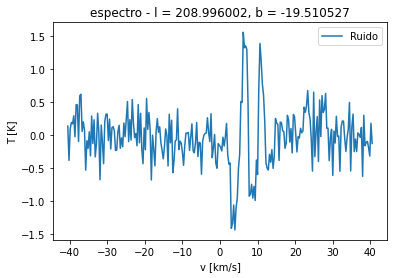

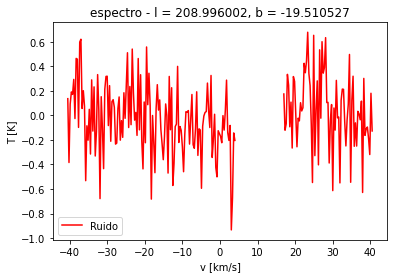

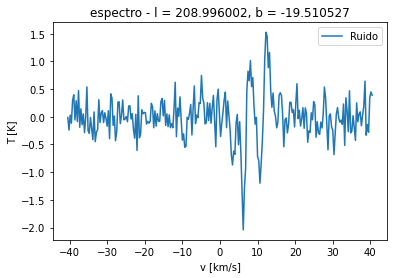

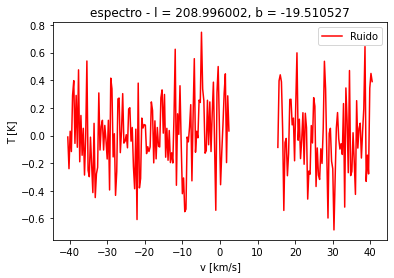

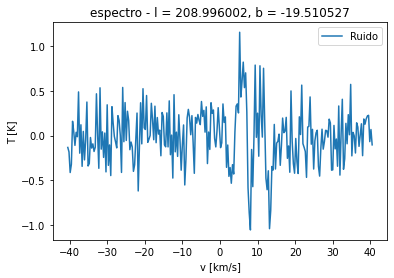

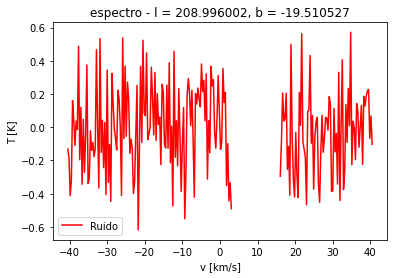

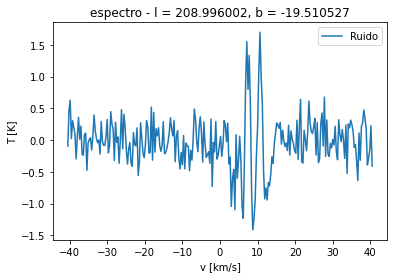

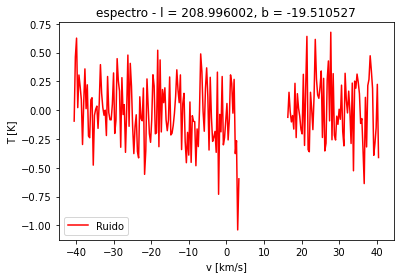

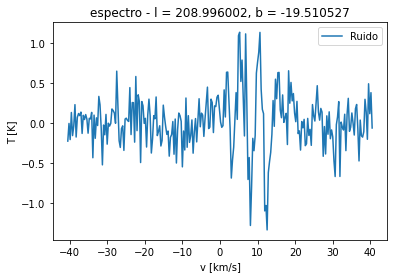

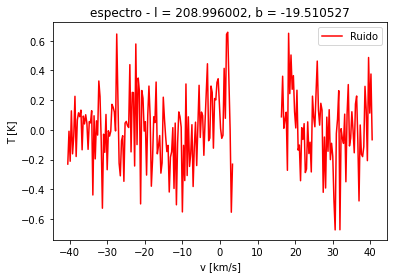

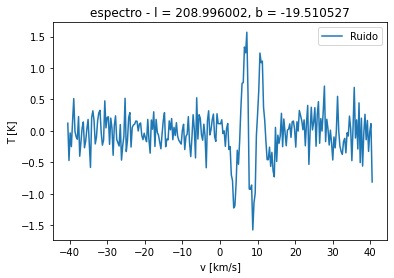

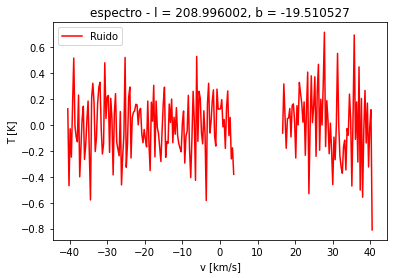

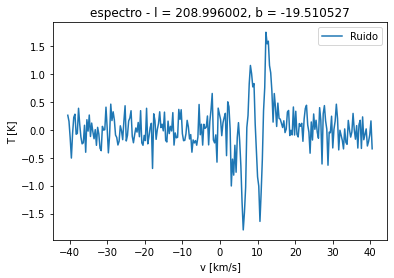

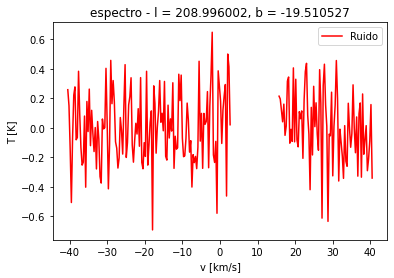

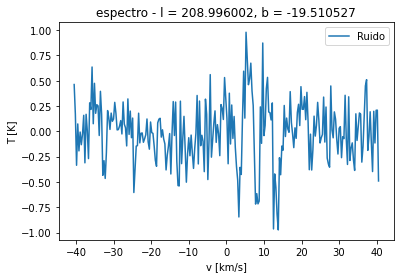

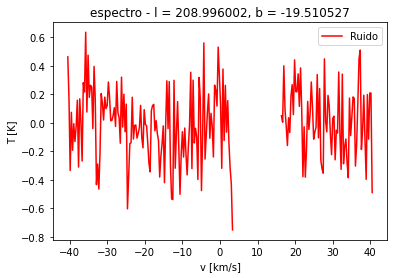

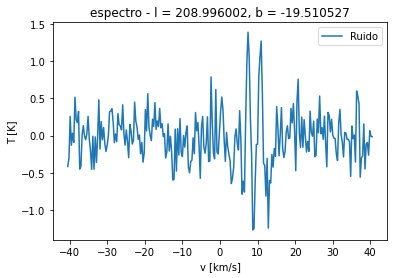

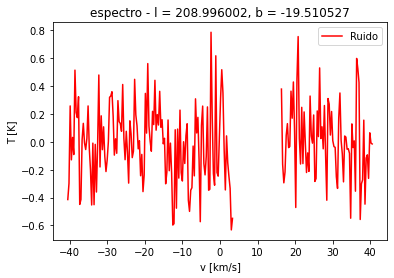

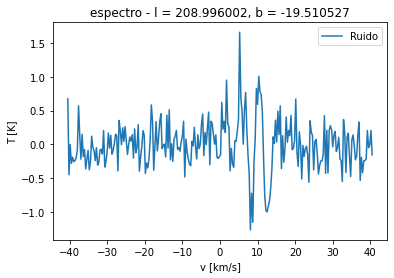

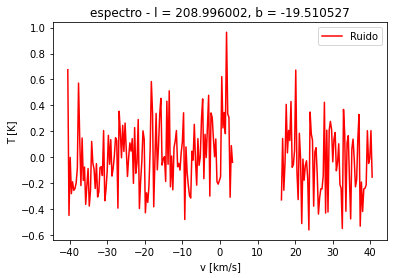

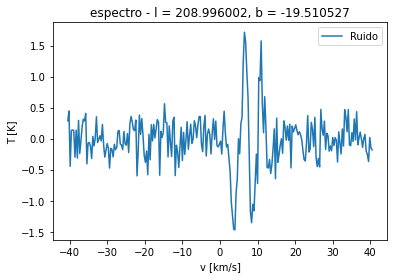

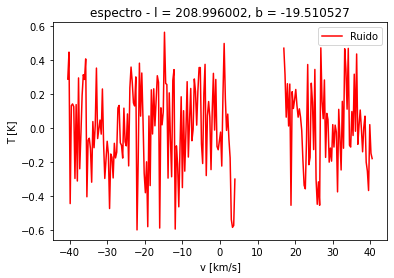

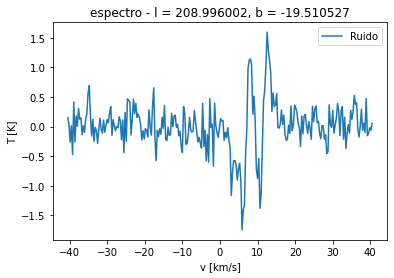

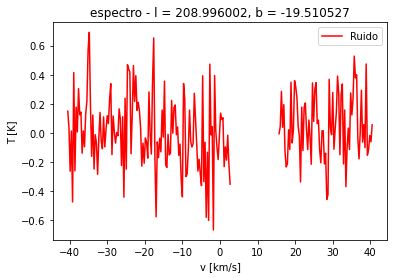

la división debería dar:  0.5773502691896258
rms promedio RUIDO1: [0.0618592  0.09912452 0.07908197 0.12499693 0.13089931]
rms individual RUIDO1: [0.11945901 0.09921841 0.09213767 0.14882696 0.16378873 0.12987127
 0.11683119 0.12028069 0.12504277 0.1819085  0.154031   0.16873957
 0.16283387 0.18083879 0.17079656]
división de a tres RUIDO1: [0.51782781 0.62346491 0.67137792 0.66603871 0.60519743 0.76325207
 0.6768909  0.65747848 0.63243931 0.68714182 0.81150506 0.74076837
 0.80388257 0.72384531 0.76640484]
rms promedio RUIDO2: [0.02843855 0.03323659 0.03495828 0.030444   0.03362276]
rms individual RUIDO2: [0.07331142 0.06720643 0.06372593 0.09469924 0.08740053 0.0744176
 0.0834572  0.06847441 0.07145411 0.08516505 0.06634143 0.06621295
 0.07998965 0.07320108 0.07320233]
división de a tres RUIDO2: [0.38791436 0.42315228 0.44626346 0.35096994 0.38027899 0.44662264
 0.41887681 0.51053063 0.48924105 0.35747052 0.45889874 0.45978915
 0.42033892 0.45932061 0.45931273]


In [8]:
#b) Promediando los espectros de las tres pasadas de la cruz, verifique que el RMS
#del ruido disminuye como 1/√N.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Ahora queremos quitarle el ajuste de la gaussiana para poder ver
#o graficar el error solo, sin la temperatura del objeto en sí.
def grafico_RUIDO1(i):
    datos, lcoord, bcoord = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
    velocidad = list(datos["vel"])
    temperatura = list(datos["Temp"])
    velocidad = np.asarray(velocidad)
    temperatura = np.asarray(temperatura)
    fig = plt.figure()
    ax = fig.add_subplot(111)
  
    def Gauss(x, A, C, B):
        y = A*np.exp(-1*((x-C)**2)/(2*B**2))
        return y
    guess = np.array([15,1,10])
    parametros, covarianza = curve_fit(Gauss, velocidad, temperatura, guess)
    fit_A = parametros[0]
    fit_B = parametros[1]
    fit_C = parametros[2]
    fit_temp = Gauss(velocidad, fit_A, fit_B, fit_C)
    #Ahora estamos en condiciones de calcular el RMS del ruido, que, 
    #haciendo un poco de álgebra, viene dado por RUIDO_{RMS}=sigma**2+mu**2
    RUIDO = temperatura-fit_temp
    sigma = np.std(RUIDO)
    mu = np.mean(RUIDO)
    RUIDO_rms = sigma**2 + mu**2
    ax.plot(velocidad, RUIDO, '-', label='Ruido')
    plt.title('espectro - l = ' + str(lcoord_111) + ', b = ' + str(bcoord_111))
    plt.xlabel('v [km/s]')
    plt.ylabel('T [K]')
    ax.legend()
    
def grafico_RUIDO2(i):
    #esta función grafica el ruido sin tener en cuenta la función gaussiana, y sin 
    #sustraerle la misma función a la dependencia original de la temperatura a la 
    #velocidad.
    datos, lcoord, bcoord = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
    velocidad = list(datos["vel"])
    temperatura = list(datos["Temp"])
    velocidad = np.asarray(velocidad)
    temperatura = np.asarray(temperatura)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    def maximo(array):
        for i in range(0,len(array)):
            if array[i]==max(array):
                return i
    #Ahora estamos en condiciones de calcular el RMS del ruido, que, 
    #haciendo un poco de álgebra, viene dado por RUIDO_{RMS}=sigma**2+mu**2
    maximo = maximo(temperatura)
    n = len(temperatura)
    a = temperatura[0:maximo-20]
    b = temperatura[maximo+20:n]
    c = velocidad[0:maximo-20]
    d = velocidad[maximo+20:n]
    RUIDO = np.concatenate((a,b),axis=0)
    #VELOCIDAD = np.concatenate((c,d),axis=0)
    sigma = np.std(RUIDO)
    mu = np.mean(RUIDO)
    RUIDO_rms = sigma**2 + mu**2
    ax.plot(c, a, '-',color='red', label='Ruido')
    ax.plot(d, b, '-',color='red')
    plt.title('espectro - l = ' + str(lcoord_111) + ', b = ' + str(bcoord_111))
    plt.xlabel('v [km/s]')
    plt.ylabel('T [K]')
    ax.legend()
    plt.show()
    
#Ahora queremos quitarle el ajuste de la gaussiana para poder ver el error solo, sin la temperatura del objeto en sí. 
def RUIDO1(i):
    datos, lcoord, bcoord = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
 
    velocidad = list(datos["vel"])
    temperatura = list(datos["Temp"])
    velocidad = np.asarray(velocidad)
    temperatura = np.asarray(temperatura)
  
    def Gauss(x, A, C, B):
        y = A*np.exp(-1*((x-C)**2)/(2*B**2))
        return y
    guess = np.array([15,1,10])
    parametros, covarianza = curve_fit(Gauss, velocidad, temperatura, guess)

    fit_A = parametros[0]
    fit_B = parametros[1]
    fit_C = parametros[2]

    fit_temp = Gauss(velocidad, fit_A, fit_B, fit_C)
    #Ahora estamos en condiciones de calcular el RMS del ruido, que, 
    #haciendo un poco de álgebra, viene dado por RUIDO_{RMS}=sigma**2+mu**2
    RUIDO = temperatura-fit_temp
    return(RUIDO)

def RUIDO2(i):
    datos, lcoord, bcoord = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
    temperatura = list(datos["Temp"])
    temperatura = np.asarray(temperatura)
    #definimos el punto en el cual nos interesa analizar el error 
    f = 0.8
    temperatura_nueva = temperatura[temperatura<f]
    return(temperatura_nueva)

#verificamos que las 3 pasadas por cada punto de la cruz tiene por RMS 
#algo inversamente proporcional a la raíz de N, con N la cantidad de datos, este
# es el primer método, es decir, sustraímos la gaussiana y calculamos el error
# promedio por cada cuadrado de la cruz y calculamos el error de las 3 pasadas 
# por cada una de las 5.
Ruidos_rms_individual = np.zeros(15)
def ruido_cuadrado(array, funcion):
    B = len(funcion(array[0]))
    C = len(funcion(array[1]))
    D = len(funcion(array[2]))
    b = min(B,C,D)
    A = np.zeros(b)
    j = int((array[0])%11)
    for i in array:
        A += (1/3)*funcion(i)[:b]
        SIGMA_1_15 = np.std(funcion(i))
        MU_1_15 = np.mean(funcion(i))
        Ruidos_rms_individual[int((i-11)/5)+3*j] = SIGMA_1_15**2 + MU_1_15**2
    N = len(A)
    SIGMA = np.std(A)
    MU = np.mean(A)
    RUIDO_rms = SIGMA**2 + MU**2
    return RUIDO_rms

def cuociente(funcion):
    ruidos_rms_promedio = np.zeros(5)
    for j in [1,2,3,4,5]:
        E = np.array([10+j, j+15, j+20])
        ruidos_rms_promedio[j-1] = ruido_cuadrado(E, funcion)
    #aquí se entrega el ruido_rms por cuadrado de la cruz, en total son cinco.
    #están ordenados por cubículo, 111, 116, 121, etc
    #ahora podemos calcular si en verdad disminuye inversamente proporcional a raíz
    # de N
    división = ruidos_rms_promedio[0]/Ruidos_rms_individual[0] 
    #ahora dividimos por cada una de las celdas, la individual sobre el promedio
    #correspondiente (al revés)
    c = np.linspace(0,14,15)
    b=''
    if funcion == RUIDO1:
        b="RUIDO1"
    else:#funcion == RUIDO2:
        b="RUIDO2"
    print("rms promedio " + str(b) + ':', +ruidos_rms_promedio)
    print("rms individual " + str(b) + ':', +Ruidos_rms_individual)
    for i in c:
        Ruidos_rms_individual[int(i)] = ruidos_rms_promedio[int(i/3)]/Ruidos_rms_individual[int(i)]
    print("división de a tres " + str(b) + ':', + Ruidos_rms_individual)

    
for i in range(11,26):
    grafico_RUIDO1(i)
    grafico_RUIDO2(i)
    
print('la división debería dar: ',+1/(np.sqrt(3)))
#Este es el primer método que calcula la razón del RMS, y consiste
#en quitar la función gaussiana.
cuociente(RUIDO1)

#Ahora bien, probamos un segundo método para calcular el RMS
#del error promedio, entonces usaremos la función RUIDO2
#cuociente(RUIDO2)
cuociente(RUIDO2)

las temperaturas integradas con respecto a las velocidades promedios por punto de la cruz son: [ 91.49145614  79.75304169 139.49554429  86.7651537   51.48378982]
Pointing eje X: 97.57299623488966
Pointing eje Y: 99.00989664250301


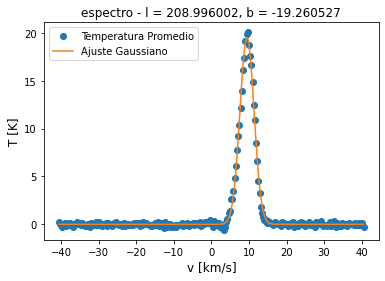

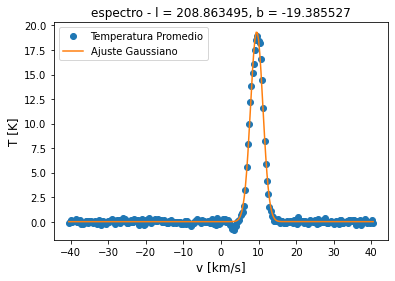

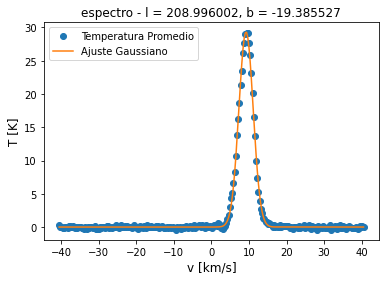

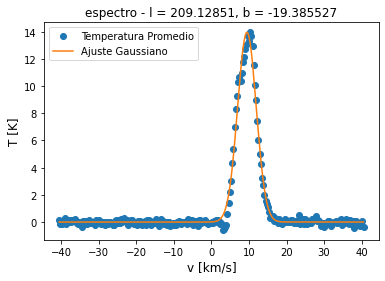

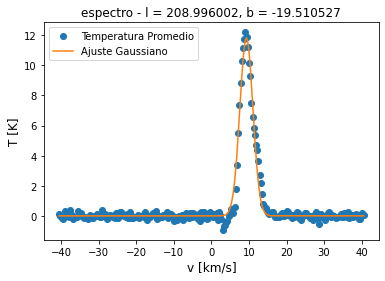

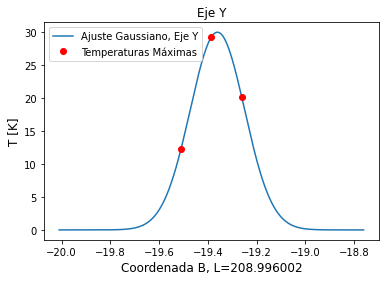

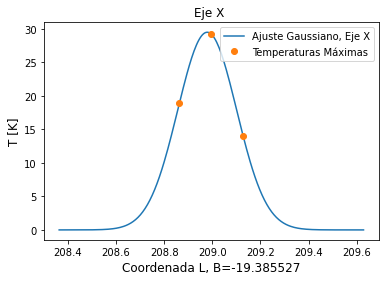

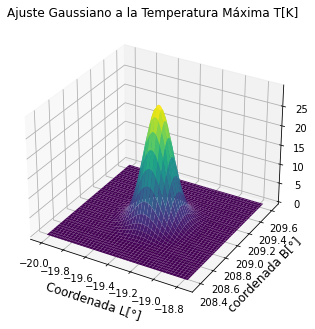

In [10]:
#c) Mostrar espectros promediados obtenidos para cada uno de los 5 puntos de la
#cruz. Fitear gaussiana a cada uno (mostrar resultados). Fitear gaussiana a Tmax (de fiteo
#anterior) vs. coordenadas (mostrar resultados). Analizar pointing de la antena (Que tan
#bien apuntó).

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from mpl_toolkits.mplot3d.axes3d import Axes3D

def datos_temperatura(i):
    datos, lcoord, bcoord = extract_data('sdf_1'+str(i)+'_1'+str(i)+'.csv')
 
    velocidad=list(datos["vel"])
    temperatura=list(datos["Temp"])
    velocidad = np.asarray(velocidad)
    temperatura = np.asarray(temperatura)
    coords = np.zeros(len(velocidad))
    coords[0] = lcoord
    coords[1] = bcoord
    return np.array([velocidad, temperatura, coords])

TEMPERATURA_MAX = np.zeros(5)
COORDENADAS_L = np.zeros(5)
COORDENADAS_B = np.zeros(5)
Integral = np.zeros(5)
for i in [1,2,3,4,5]:
    promedio = np.zeros(256)
    a = datos_temperatura(i+10)[1]
    b = datos_temperatura(i+15)[1]
    c = datos_temperatura(i+20)[1]
    promedio += (a + b + c)/3
    TEMPERATURA_MAX[i-1] = max(promedio)
    velocidad = datos_temperatura(i+10)[0]
    lcoord = datos_temperatura(i+10)[2, 0]
    bcoord = datos_temperatura(i+10)[2, 1]
    COORDENADAS_L[i-1] = lcoord
    COORDENADAS_B[i-1] = bcoord
    fig = plt.figure()
    ax = fig.add_subplot(111)
    guess = np.array([15,1,10])
    parametros, covarianza = curve_fit(Gauss, velocidad, promedio, guess)
    fit_A = parametros[0]
    fit_B = parametros[1]
    fit_C = parametros[2]
    
    #se calcula la integral total de la gaussiana promedio para la temperatura versus
    #la velocidad, para cada uno de los cinco puntos.
    Integral[i-1] = quad(Gauss, -40,40, args=(fit_A,fit_B,fit_C))[0]

    fit_temp = Gauss(velocidad, fit_A, fit_B, fit_C)
    ax.plot(velocidad, promedio, 'o', label='Temperatura Promedio')
    ax.plot(velocidad, fit_temp, '-', label='Ajuste Gaussiano')
    
    plt.title('espectro - l = ' + str(lcoord) + ', b = ' + str(bcoord))
    plt.xlabel('v [km/s]', fontsize=12)
    plt.ylabel('T [K]', fontsize=12)
    ax.legend() 
print("las temperaturas integradas con respecto a las velocidades promedios por punto de la cruz son:",+Integral)


#ahora graficamos una gaussiana para las 3 temperaturas máximas por eje:

guess1, guess2 = np.array([29,1,-19]), np.array([30,1,208])

o, p, q = TEMPERATURA_MAX[0], TEMPERATURA_MAX[2], TEMPERATURA_MAX[4]
x, y, z = TEMPERATURA_MAX[1], TEMPERATURA_MAX[2], TEMPERATURA_MAX[3]
b1, b2, b3 = COORDENADAS_B[0], COORDENADAS_B[2], COORDENADAS_B[4]
l1, l2, l3 = COORDENADAS_L[1], COORDENADAS_L[2], COORDENADAS_L[3]
COORDX, COORDY = np.array([b1,b2,b3]), np.array([l1,l2,l3])

TEMP_MAX_X, TEMP_MAX_Y = np.array([o,p,q]), np.array([x,y,z])
parametrosx, cX = curve_fit(Gauss, COORDX, TEMP_MAX_X, guess1, sigma=None, absolute_sigma=True)
parametrosy, cY = curve_fit(Gauss, COORDY, TEMP_MAX_Y, guess2, sigma=None, absolute_sigma=True)
fit_AX, fit_BX, fit_CX = parametrosx[0], parametrosx[1], parametrosx[2]
fit_AY, fit_BY, fit_CY = parametrosy[0], parametrosy[1], parametrosy[2]
coordenadasX = np.linspace(min(COORDX)-0.5, max(COORDX)+0.5, 256)
coordenadasY = np.linspace(min(COORDY)-0.5, max(COORDY)+0.5, 256)

fit_tempx = Gauss(coordenadasX, fit_AX, fit_BX, fit_CX)
fit_tempy = Gauss(coordenadasY, fit_AY, fit_BY, fit_CY)

#queremos también obtener el pointing de lo observado vs el ajuste máximo
obsx = max(TEMP_MAX_X)
ajustx = max(fit_tempx)
print('Pointing eje X: '+str((100*obsx)/ajustx))
obsy = max(TEMP_MAX_Y)
ajusty = max(fit_tempy)
print('Pointing eje Y: '+str((100*obsy)/ajusty))

#aquí se grafica
fig1 = plt.figure()
bx = fig1.add_subplot(111)
bx.plot(coordenadasX, fit_tempx, '-', label='Ajuste Gaussiano, Eje Y')
bx.plot(COORDX, TEMP_MAX_X, 'o', color="red", label='Temperaturas Máximas')
plt.title('Eje Y')
plt.xlabel('Coordenada B, L=208.996002', fontsize=12)
plt.ylabel('T [K]', fontsize=12)
bx.legend()

fig2 = plt.figure()
cx = fig2.add_subplot(111)
cx.plot(coordenadasY, fit_tempy, '-', label='Ajuste Gaussiano, Eje X')
cx.plot(COORDY, TEMP_MAX_Y, 'o', label='Temperaturas Máximas')
plt.title('Eje X ')
plt.xlabel('Coordenada L, B=-19.385527', fontsize=12)
plt.ylabel('T [K]', fontsize=12)

cx.legend()
plt.show()

#Ahora nos interesa poner una imagen en 3d de lo anterior;
fig5 = plt.figure()
axes3d = Axes3D(fig5)
 
X,Y = np.meshgrid(coordenadasX,coordenadasY)
Z = ((fit_AX+fit_AY)/2)*np.exp(-1*(((X-fit_BX)**2)/(2*fit_CX**2) + ((Y-fit_BY)**2)/(2*fit_CY**2)))

plt.title('Ajuste Gaussiano a la Temperatura Máxima T[K]')
plt.xlabel('Coordenada L[°]', fontsize=12)
plt.ylabel('coordenada B[°]', fontsize=12)
axes3d.plot_surface(X,Y,Z,cmap='viridis')
plt.show()

139.4955442877496 143.6018034822626
139.4955442877496 139.59825590119382
Pointing eje X: 97.1405239384614
Pointing eje Y: 99.92642342643813


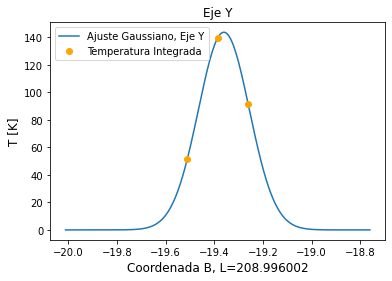

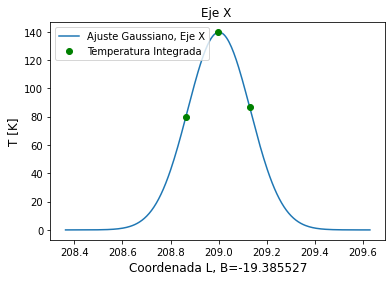

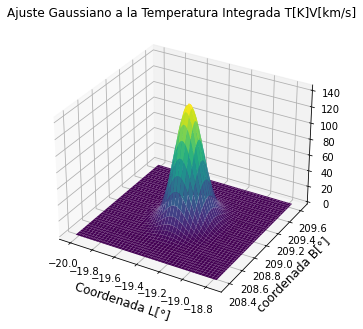

In [32]:
# d) Fitear gaussiana a la temperatura integrada en las velocidades de cada espectro
#    vs coordenadas X e Y (mostrar resultado, analizar pointing).
#Aquí lo que hacemos es simplemente lo mismo que para la temperatura, solo que con
#la temperatura integrada c/r a la velocidad (promedio para cada punto de la cruz)
from mpl_toolkits.mplot3d.axes3d import Axes3D

guess3, guess4 = np.array([29,1,-19]), np.array([30,1,208])

o1, p1, q1 = Integral[0], Integral[2], Integral[4]
x1, y1, z1 = Integral[1], Integral[2], Integral[3]
b11, b21, b31 = COORDENADAS_B[0], COORDENADAS_B[2], COORDENADAS_B[4]
l11, l21, l31 = COORDENADAS_L[1], COORDENADAS_L[2], COORDENADAS_L[3]
COORDX1, COORDY1 = np.array([b11,b21,b31]), np.array([l11, l21, l31])

TEMP_int_X, TEMP_int_Y = np.array([o1, p1, q1]), np.array([x1, y1, z1])
parametrosx1, cX1 = curve_fit(Gauss, COORDX1, TEMP_int_X, guess3, sigma=None, absolute_sigma=True)
parametrosy1, cY1 = curve_fit(Gauss, COORDY1, TEMP_int_Y, guess4, sigma=None, absolute_sigma=True)
fit_AX1, fit_BX1, fit_CX1 = parametrosx1[0], parametrosx1[1], parametrosx1[2]
fit_AY1, fit_BY1, fit_CY1 = parametrosy1[0], parametrosy1[1], parametrosy1[2]
coordenadasX1 = np.linspace(min(COORDX)-0.5, max(COORDX)+0.5, 256)
coordenadasY1 = np.linspace(min(COORDY)-0.5, max(COORDY)+0.5, 256)

fit_tempxint = Gauss(coordenadasX1, fit_AX1, fit_BX1, fit_CX1)
fit_tempyint = Gauss(coordenadasY1, fit_AY1, fit_BY1, fit_CY1)

#queremos también obtener el pointing de lo observado vs el ajuste máximo
obsx1 = max(TEMP_int_X)
ajustx1 = max(fit_tempxint)
obsy1 = max(TEMP_int_Y)
ajusty1 = max(fit_tempyint)
print(obsx1, ajustx1)
print(obsy1, ajusty1)
print('Pointing eje X: '+str((100*obsx1)/ajustx1))
print('Pointing eje Y: '+str((100*obsy1)/ajusty1))

#aquí se grafica
fig3 = plt.figure()
bx = fig3.add_subplot(111)
bx.plot(coordenadasX1, fit_tempxint, '-', label='Ajuste Gaussiano, Eje Y')
bx.plot(COORDX1, TEMP_int_X, 'o', color="orange", label='Temperatura Integrada')
plt.title('Eje Y')
plt.xlabel('Coordenada B, L=208.996002', fontsize=12)
plt.ylabel('T [K]', fontsize=12)
bx.legend()

fig4 = plt.figure()
cx = fig4.add_subplot(111)
cx.plot(coordenadasY1, fit_tempyint, '-', label='Ajuste Gaussiano, Eje X')
cx.plot(COORDY1, TEMP_int_Y, 'o', color="green", label='Temperatura Integrada')
plt.title('Eje X ')
plt.xlabel('Coordenada L, B=-19.385527', fontsize=12)
plt.ylabel('T [K]', fontsize=12)

cx.legend()
plt.show()


#Ahora nos interesa poner una imagen en 3d de lo anterior;
fig6 = plt.figure()
axes3d = Axes3D(fig6)
 
X1,Y1 = np.meshgrid(coordenadasX1,coordenadasY1)
Z1 = fit_AX1*np.exp(-1*(((X1-fit_BX1)**2)/(2*fit_CX1**2) + ((Y1-fit_BY1)**2)/(2*fit_CY1**2)))

plt.title('Ajuste Gaussiano a la Temperatura Integrada T[K]V[km/s]')
plt.xlabel('Coordenada L[°]', fontsize=12)
plt.ylabel('coordenada B[°]', fontsize=12)

axes3d.plot_surface(X1,Y1,Z1,cmap='viridis')
plt.show()